In [26]:
import os
import sys
import glob

from sklearn.cluster import KMeans
import seaborn  as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, KernelPCA
import PIL.ImageStat as stat
from PIL import Image
import re 

from skimage import color, viewer, exposure, img_as_float, data


from sklearn_extensions.fuzzy_kmeans import KMedians, FuzzyKMeans

import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np


from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

## MNIST +

In [16]:
from keras.datasets import mnist

from utils import * 

from sklearn.preprocessing import StandardScaler
from sklearn.manifold import MDS, TSNE, SpectralEmbedding
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import SpectralClustering
from sklearn.svm import SVC # Support vector classifier

In [17]:
    # load dataset mnist 
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    n_train, img_weight_train, _ = X_train.shape
    n_test, img_weight_test, _ = X_test.shape
    
    X_train = X_train.reshape(n_train, img_weight_train**2)
    X_test = X_test.reshape(n_test, img_weight_test**2)

### Red neuronal

In [32]:
?MLPClassifier

/home/enrique/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/enrique/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best score: 0.8867833333333334
Best C: [10, 10]
Best Kernel: 1
Best Gamma: relu
Best Gamma: 200


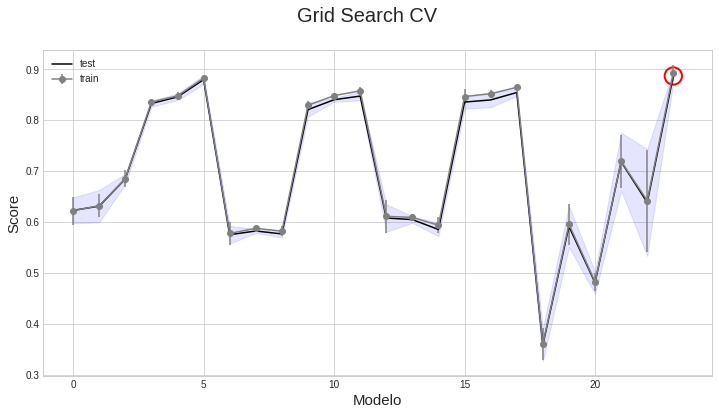

In [39]:
pipe =  Pipeline([('pca', PCA()), ("mlp", MLPClassifier(random_state=semilla, solver='lbfgs'))])


parameters = [
{'mlp__hidden_layer_sizes':[[3,10],[10,10]], 'mlp__alpha': [1],
 'mlp__activation':['identity', 'logistic', 'tanh', 'relu'],'pca__n_components':[50, 80, 200]}]


cvfolds = 4
GS = GridSearchCV(estimator=pipe, param_grid=parameters, cv = cvfolds,
                  return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

print('Best score:', GS.best_score_)
print('Best C:',GS.best_params_["mlp__hidden_layer_sizes"])
print('Best Kernel:',GS.best_params_["mlp__alpha"])
print('Best Gamma:',GS.best_params_["mlp__activation"])
print('Best Gamma:',GS.best_params_["pca__n_components"])


scores_mean = GS.cv_results_['mean_test_score']
scores_sd = GS.cv_results_['std_test_score']
scores_mean_tr = GS.cv_results_['mean_train_score']
scores_sd_tr = GS.cv_results_['std_train_score']

plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd,
                 alpha=0.1, color='blue')

plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),],
            s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray',
             ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV',size=20)
plt.legend(loc="best")
plt.show()

In [38]:
?MLPClassifier

/home/enrique/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/enrique/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best score: 0.8927999999999999


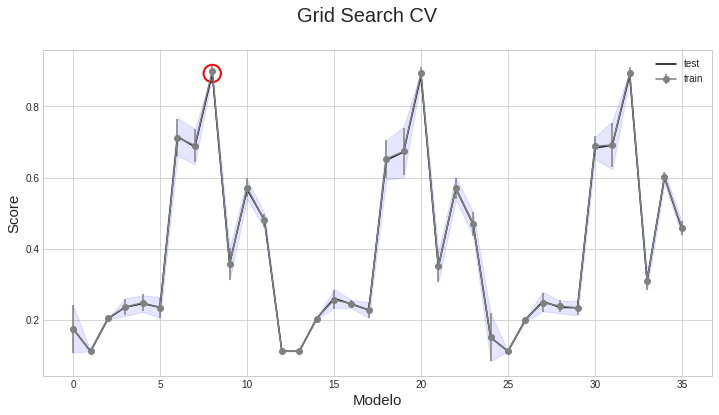

In [20]:
pipe =  Pipeline([('pca', PCA()), ("mlp", MLPClassifier(random_state=semilla, solver='lbfgs'))])


parameters = [
{'mlp__hidden_layer_sizes':[[1,1], [1,10], [10,10], [3,10]], 'mlp__alpha': [0.1, 0.5, 0.01], 'pca__n_components':[50, 80, 200]}]


cvfolds = 4
GS = GridSearchCV(estimator=pipe, param_grid=parameters, cv = cvfolds,
                  return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

print('Best score:', GS.best_score_)

scores_mean = GS.cv_results_['mean_test_score']
scores_sd = GS.cv_results_['std_test_score']
scores_mean_tr = GS.cv_results_['mean_train_score']
scores_sd_tr = GS.cv_results_['std_train_score']

plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd,
                 alpha=0.1, color='blue')

plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),],
            s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray',
             ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV',size=20)
plt.legend(loc="best")
plt.show()

/home/enrique/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best score: 0.44475


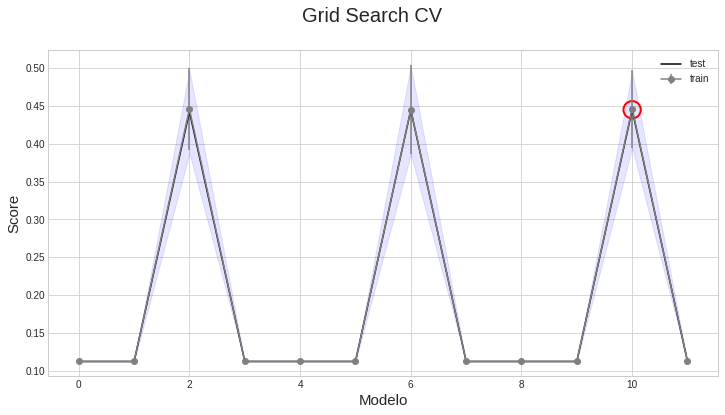

In [22]:
pipe =  Pipeline([("mlp", MLPClassifier(random_state=semilla, solver='lbfgs'))])


parameters = [
{'mlp__hidden_layer_sizes':[[1,1], [1,10], [10,10], [3,10]], 'mlp__alpha': [0.1, 0.5, 0.01]}]


cvfolds = 4
GS = GridSearchCV(estimator=pipe, param_grid=parameters, cv = cvfolds,
                  return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

print('Best score:', GS.best_score_)

scores_mean = GS.cv_results_['mean_test_score']
scores_sd = GS.cv_results_['std_test_score']
scores_mean_tr = GS.cv_results_['mean_train_score']
scores_sd_tr = GS.cv_results_['std_train_score']

plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd,
                 alpha=0.1, color='blue')

plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),],
            s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray',
             ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV',size=20)
plt.legend(loc="best")
plt.show()

## SVC

In [35]:
?SVC

/home/enrique/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/enrique/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:258: ConvergenceWarning: Solver terminated early (max_iter=400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Best score: 0.75
Best C: 1
Best Kernel: linear
Best Gamma: 200


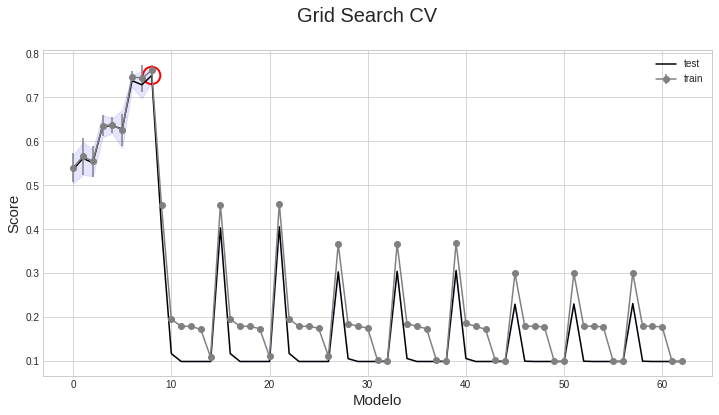

In [23]:
pipe =  Pipeline([('pca', PCA()), ('svc', SVC(max_iter=400))])

parameters = [
{'svc__C': [0.001, 0.01, 1], 'svc__kernel': ['linear'], 'pca__n_components':[50, 80, 200]},
    {'svc__C': [0.001, 0.01, 1], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10,100], 'svc__kernel': ['rbf'],
    'pca__n_components':[50, 80, 200]}]
# Realiza Grid Search
cvfolds = 4
GS = GridSearchCV(estimator=pipe, param_grid=parameters, cv = cvfolds,
                  return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

print('Best score:', GS.best_score_)
print('Best C:',GS.best_params_["svc__C"])
print('Best Kernel:',GS.best_params_["svc__kernel"])
print('Best Gamma:',GS.best_params_["pca__n_components"])

scores_mean = GS.cv_results_['mean_test_score']
scores_sd = GS.cv_results_['std_test_score']
scores_mean_tr = GS.cv_results_['mean_train_score']
scores_sd_tr = GS.cv_results_['std_train_score']

plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd,
                 alpha=0.1, color='blue')

plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),],
            s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray',
             ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV',size=20)
plt.legend(loc="best")
plt.show()


## Tree

/home/enrique/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best score: 0.4381166666666667
Best C: 5
Best Kernel: log2
Best Gamma: 50


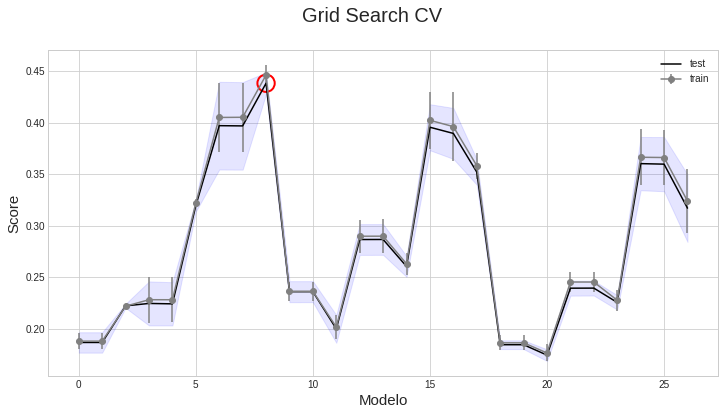

In [27]:
pipe =  Pipeline([('pca', PCA()), ('tree', DecisionTreeClassifier(random_state=semilla))])
parameters = [
{"tree__max_depth":[2, 3, 5], "tree__max_features":['auto', 'sqrt','log2'],
 'pca__n_components':[50, 80, 200]}]
# Realiza Grid Search
cvfolds = 4
GS = GridSearchCV(estimator=pipe, param_grid=parameters, cv = cvfolds,
                  return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

print('Best score:', GS.best_score_)
print('Best C:',GS.best_params_["tree__max_depth"])
print('Best Kernel:',GS.best_params_["tree__max_features"])
print('Best Gamma:',GS.best_params_["pca__n_components"])

scores_mean = GS.cv_results_['mean_test_score']
scores_sd = GS.cv_results_['std_test_score']
scores_mean_tr = GS.cv_results_['mean_train_score']
scores_sd_tr = GS.cv_results_['std_train_score']

plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd,
                 alpha=0.1, color='blue')

plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),],
            s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray',
             ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV',size=20)
plt.legend(loc="best")
plt.show()

In [ ]:
pipe =  Pipeline([('tree', DecisionTreeClassifier(random_state=semilla))])
parameters = [
{"tree__max_depth":[2,3,5, 15, 20, 10, 30], "tree__max_features":['auto', 'sqrt','log2']}]
# Realiza Grid Search
cvfolds = 4
GS = GridSearchCV(estimator=pipe, param_grid=parameters, cv = cvfolds,
                  return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

print('Best score:', GS.best_score_)
print('Best C:',GS.best_params_["tree__max_depth"])
print('Best Kernel:',GS.best_params_["tree__max_features"])

scores_mean = GS.cv_results_['mean_test_score']
scores_sd = GS.cv_results_['std_test_score']
scores_mean_tr = GS.cv_results_['mean_train_score']
scores_sd_tr = GS.cv_results_['std_train_score']

plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd,
                 alpha=0.1, color='blue')

plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),],
            s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray',
             ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV',size=20)
plt.legend(loc="best")
plt.show()

## ADA

/home/enrique/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best score: 0.7285666666666666
Best C: 200
Best Kernel: SAMME


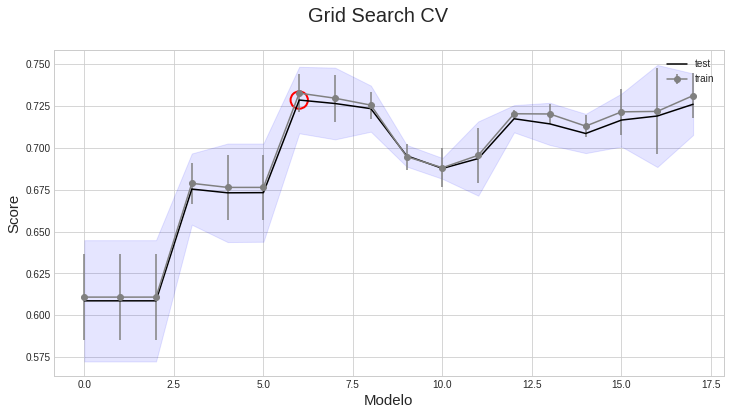

In [40]:
pipe =  Pipeline([('pca', PCA()), ('ada', AdaBoostClassifier(DecisionTreeClassifier(random_state=semilla, max_depth=1)))])


parameters = [
{"ada__n_estimators":[50, 100, 200], "ada__algorithm":['SAMME', 'SAMME.R'],
 'pca__n_components':[50, 80, 200]}]

# Realiza Grid Search
cvfolds = 4
GS = GridSearchCV(estimator=pipe, param_grid=parameters, cv = cvfolds,
                  return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

print('Best score:', GS.best_score_)
print('Best C:',GS.best_params_["ada__n_estimators"])
print('Best Kernel:',GS.best_params_["ada__algorithm"])

scores_mean = GS.cv_results_['mean_test_score']
scores_sd = GS.cv_results_['std_test_score']
scores_mean_tr = GS.cv_results_['mean_train_score']
scores_sd_tr = GS.cv_results_['std_train_score']


plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd,
                 alpha=0.1, color='blue')

plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),],
            s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray',
             ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV',size=20)
plt.legend(loc="best")
plt.show()

Best score: 0.7795
Best C: 3
Best Kernel: log2


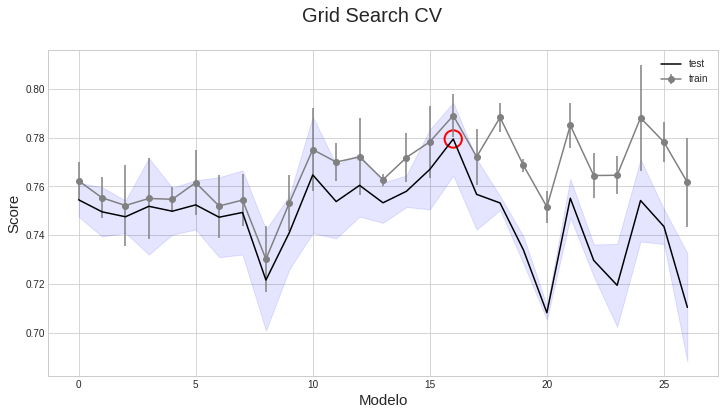

In [28]:
pipe =  Pipeline([('pca', PCA()), ('ada', AdaBoostClassifier(DecisionTreeClassifier(random_state=semilla)))])


parameters = [
{"ada__base_estimator__max_depth":[2, 3, 5], "ada__base_estimator__max_features":['auto', 'sqrt','log2'],
 'pca__n_components':[50, 80, 200]}]

# Realiza Grid Search
cvfolds = 4
GS = GridSearchCV(estimator=pipe, param_grid=parameters, cv = cvfolds,
                  return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

print('Best score:', GS.best_score_)
print('Best C:',GS.best_params_["ada__base_estimator__max_depth"])
print('Best Kernel:',GS.best_params_["ada__base_estimator__max_features"])

scores_mean = GS.cv_results_['mean_test_score']
scores_sd = GS.cv_results_['std_test_score']
scores_mean_tr = GS.cv_results_['mean_train_score']
scores_sd_tr = GS.cv_results_['std_train_score']


plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd,
                 alpha=0.1, color='blue')

plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),],
            s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray',
             ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV',size=20)
plt.legend(loc="best")
plt.show()

In [ ]:
pipe =  Pipeline([('ada', AdaBoostClassifier(DecisionTreeClassifier(random_state=semilla)))])


parameters = [
{"ada__base_estimator__max_depth":[2, 3, 5], 
 "ada__base_estimator__max_features":['auto', 'sqrt','log2']}]

# Realiza Grid Search
cvfolds = 4
GS = GridSearchCV(estimator=pipe, param_grid=parameters, cv = cvfolds,
                  return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

print('Best score:', GS.best_score_)
print('Best C:',GS.best_params_["ada__base_estimator__max_depth"])
print('Best Kernel:',GS.best_params_["ada__base_estimator__max_features"])

scores_mean = GS.cv_results_['mean_test_score']
scores_sd = GS.cv_results_['std_test_score']
scores_mean_tr = GS.cv_results_['mean_train_score']
scores_sd_tr = GS.cv_results_['std_train_score']


plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd,
                 alpha=0.1, color='blue')

plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),],
            s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray',
             ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV',size=20)
plt.legend(loc="best")
plt.show()

### QDA

Best score: 0.9589833333333334
Best PCA: 50


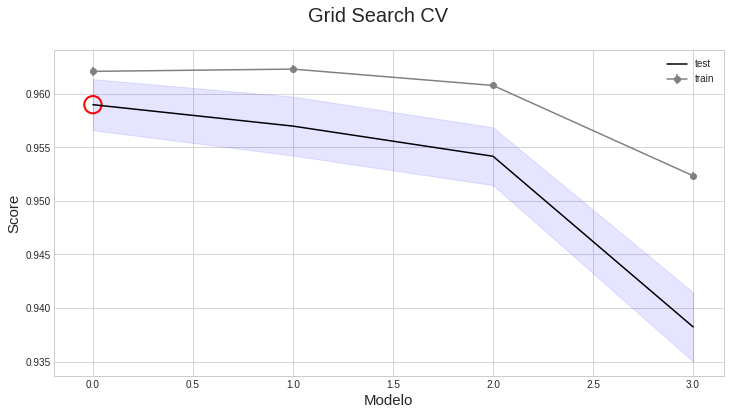

In [41]:
parameters = [{'pca__n_components':[50,80,100,200]}]
# Realiza Grid Search
cvfolds = 4
pipe =  Pipeline([('pca', PCA()), ('qda', QuadraticDiscriminantAnalysis(store_covariance=True))])
GS = GridSearchCV(estimator=pipe, param_grid=parameters, cv = cvfolds,
                  return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

print('Best score:', GS.best_score_)
#print('Best C:',GS.best_params_["svc__C"])
#print('Best Kernel:',GS.best_params_["svc__kernel"])
print('Best PCA:',GS.best_params_["pca__n_components"])

scores_mean = GS.cv_results_['mean_test_score']
scores_sd = GS.cv_results_['std_test_score']
scores_mean_tr = GS.cv_results_['mean_train_score']
scores_sd_tr = GS.cv_results_['std_train_score']

plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd,
                 alpha=0.1, color='blue')

plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),],
            s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray',
             ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV',size=20)
plt.legend(loc="best")
plt.show()

In [42]:
y_predict = GS.predict(X_test)

In [43]:
from sklearn import metrics


AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       1.00      0.97      0.98      1135
           2       0.93      0.97      0.95      1032
           3       0.96      0.96      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.97      0.97       892
           6       0.99      0.96      0.98       958
           7       0.98      0.93      0.96      1028
           8       0.89      0.96      0.93       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



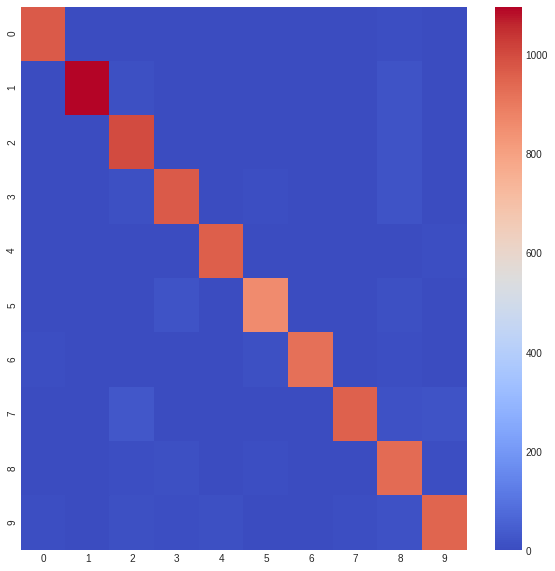

In [47]:
y_predict = GS.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
fig, axs = plt.subplots(figsize=(10,10))
print(sns.heatmap(confusion_matrix, annot=False, cmap="coolwarm", xticklabels = True, yticklabels = True))
print(metrics.classification_report(y_test, y_predict))

### Ejercicio Extra

In [80]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold


In [48]:
def quantiles_im(im):
    aux = np.zeros([1,9])
    h=0
    for i in range(2):
        for j in [0.25, 0.5, 0.75]:
            aux[0,h] = np.quantile(im[:,:,i], q=j)
            h +=1
    return aux

In [49]:
path_fruits = glob.glob("../Tarea_3/data_fruits_tarea/*.jpg")

median_fruits = np.zeros([1300, 3])
for i in range(len(path_fruits)):
    im = Image.open(path_fruits[i])
    s = stat.Stat(im)
    median_fruits[i] = s.median
    
path_fruits_new = [i[11:] for i in path_fruits]
name_fruits = [string[string.find("/")+1:string.find("_", string.find("/"))] for string in path_fruits_new]
apple = [i.startswith("Apple")==False for i in name_fruits]
name_fruits = pd.DataFrame({"path":path_fruits,"name":name_fruits, "apple":apple}) 
name_fruits["name_new"] = name_fruits[["path", "apple", "name"]].apply(lambda x: x[2] if x[1] else x[0][x[0].find("/")+1:x[0].find("_", x[0].find("/")+7)], axis=1)
name_fruits = name_fruits["name_new"].to_numpy()

In [50]:
df = pd.DataFrame({"red":median_fruits[:,0],
                 "blue":median_fruits[:,1],
                 "gren":median_fruits[:,2],
                  "fruit":name_fruits})

In [51]:
df

,red,blue,gren,fruit
0,251.0,253.0,250.0,Carambula
1,211.0,204.0,114.0,Tarea_3/data
2,56.0,7.0,8.0,Cherry
3,162.0,128.0,84.0,Kiwi
4,150.0,117.0,80.0,Kiwi
...,...,...,...,...
1295,147.0,61.0,40.0,Peach
1296,174.0,101.0,19.0,Orange
1297,154.0,65.0,34.0,Peach
1298,240.0,228.0,208.0,Carambula


In [52]:
quantile_fruits = np.zeros([1300, 9])
for i in range(len(path_fruits)):
    im = Image.open(path_fruits[i])
    im_hsv = color.rgb2hsv(im)
    quantile_fruits[i] = quantiles_im(im_hsv)

In [53]:
df_new = pd.concat([df,pd.DataFrame(quantile_fruits)], axis=1)

In [54]:
df_new.drop(columns={"fruit"}, inplace=True)

In [61]:
X = df_new.to_numpy()

In [82]:
number_state=19970808

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, name_fruits, test_size=0.30, random_state=number_state,
                                                   stratify=name_fruits)

### Redes

/home/enrique/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Best score: 0.6130738465105495


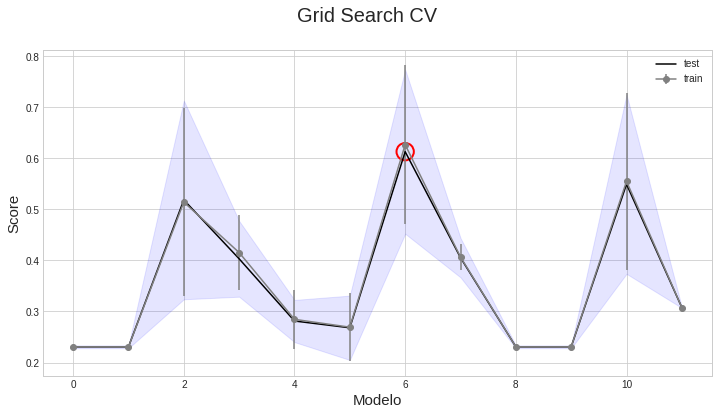

In [111]:
pipe =  Pipeline([("mlp", MLPClassifier(random_state=semilla, solver='lbfgs'))])

parameters = [
{'mlp__hidden_layer_sizes':[[1,1], [1,10], [10,10], [3,10]], 'mlp__alpha': [0.1, 0.5, 0.01]}]


cvfolds = 4
GS = GridSearchCV(estimator=pipe, param_grid=parameters, cv = cvfolds,
                  return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

print('Best score:', GS.best_score_)

scores_mean = GS.cv_results_['mean_test_score']
scores_sd = GS.cv_results_['std_test_score']
scores_mean_tr = GS.cv_results_['mean_train_score']
scores_sd_tr = GS.cv_results_['std_train_score']

plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd,
                 alpha=0.1, color='blue')

plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),],
            s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray',
             ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV',size=20)
plt.legend(loc="best")
plt.show()

In [95]:
import numpy as np

In [97]:
np.concatenate([scores_mean, scores_mean])

array([0.9670473 , 0.94507883, 0.95275427, 0.9857118 , 0.99121358,
       0.98573595, 0.99780702, 0.99890351, 0.99671053, 0.9670473 ,
       0.94507883, 0.95275427, 0.9857118 , 0.99121358, 0.98573595,
       0.99780702, 0.99890351, 0.99671053])

### SMV

Best score: 0.9615213695030528
Best C: 1
Best Kernel: rbf


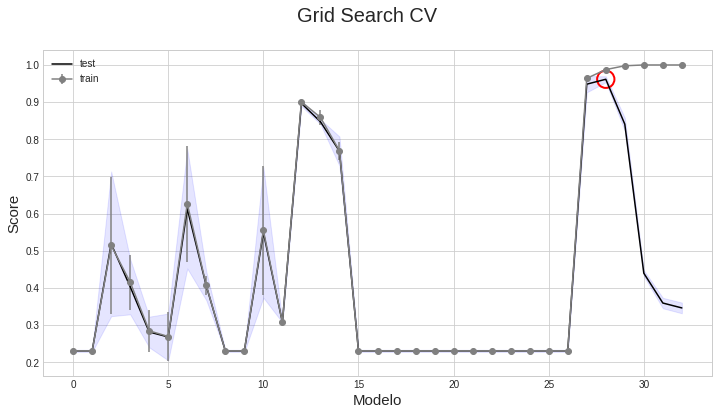

In [112]:
parameters = [
{'svc__C': [0.001, 0.01, 1], 'svc__kernel': ['linear']},
    {'svc__C': [0.001, 0.01, 1], 'svc__gamma': [0.001, 0.01, 0.1, 1, 10,100], 'svc__kernel': ['rbf']}]
# Realiza Grid Search
cvfolds = 4
pipe =  Pipeline([('svc', SVC(max_iter=400))])
GS = GridSearchCV(estimator=pipe, param_grid=parameters, cv = cvfolds,
                  return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

print('Best score:', GS.best_score_)
print('Best C:',GS.best_params_["svc__C"])
print('Best Kernel:',GS.best_params_["svc__kernel"])

scores_mean = np.concatenate([scores_mean,GS.cv_results_['mean_test_score']])
scores_sd = np.concatenate([scores_sd, GS.cv_results_['std_test_score']])
scores_mean_tr = np.concatenate([scores_mean_tr,GS.cv_results_['mean_train_score']])
scores_sd_tr = np.concatenate([scores_sd_tr,GS.cv_results_['std_train_score']])

plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd,
                 alpha=0.1, color='blue')

plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),],
            s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray',
             ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV',size=20)
plt.legend(loc="best")
plt.show()


Best score: 0.9813258366179767
Best C: 15
Best Kernel: auto


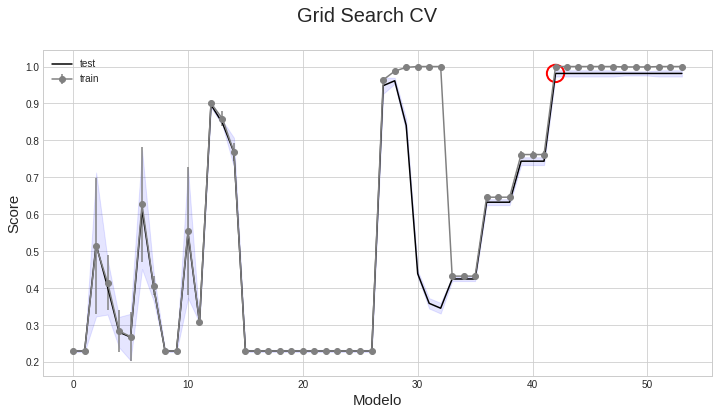

In [113]:
pipe =  Pipeline([('tree', DecisionTreeClassifier(random_state=semilla))])
parameters = [
{"tree__max_depth":[2,3,5, 15, 20, 10, 30], "tree__max_features":['auto', 'sqrt','log2']}]
# Realiza Grid Search
cvfolds = 4
GS = GridSearchCV(estimator=pipe, param_grid=parameters, cv = cvfolds,
                  return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

print('Best score:', GS.best_score_)
print('Best C:',GS.best_params_["tree__max_depth"])
print('Best Kernel:',GS.best_params_["tree__max_features"])

scores_mean = np.concatenate([scores_mean,GS.cv_results_['mean_test_score']])
scores_sd = np.concatenate([scores_sd, GS.cv_results_['std_test_score']])
scores_mean_tr = np.concatenate([scores_mean_tr,GS.cv_results_['mean_train_score']])
scores_sd_tr = np.concatenate([scores_sd_tr,GS.cv_results_['std_train_score']])

plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (12, 6)
plt.fill_between(x_ax, scores_mean - scores_sd, scores_mean + scores_sd,
                 alpha=0.1, color='blue')

plt.plot(x_ax, scores_mean, color='black',label='test')
plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),],
            s=300, linewidth=2, facecolors = 'none', edgecolors='red')
plt.errorbar(x_ax, scores_mean_tr, yerr=scores_sd_tr, fmt='-o', color='gray',
             ecolor='gray',label='train')
plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV',size=20)
plt.legend(loc="best")
plt.show()

In [107]:
scores_mean

array([0.23077518, 0.23077518, 0.51860171, 0.40317548, 0.28134419,
       0.26805588, 0.61307385, 0.40543608, 0.23077518, 0.23077518,
       0.54927931, 0.30769379, 0.89668831, 0.84725925, 0.76806071,
       0.23077518, 0.23077518, 0.23077518, 0.23077518, 0.23077518,
       0.23077518, 0.23077518, 0.23077518, 0.23077518, 0.23077518,
       0.23077518, 0.23077518, 0.94831517, 0.96152137, 0.84066099,
       0.4395529 , 0.35933998, 0.3461531 ])

In [114]:
pipe =  Pipeline([('ada', AdaBoostClassifier(DecisionTreeClassifier(random_state=semilla)))])


parameters = [
{"ada__base_estimator__max_depth":[2, 3, 5], 
 "ada__base_estimator__max_features":['auto', 'sqrt','log2']}]

# Realiza Grid Search
cvfolds = 4
GS = GridSearchCV(estimator=pipe, param_grid=parameters, cv = cvfolds,
                  return_train_score=True, n_jobs=-1)
GS.fit(X_train,y_train)

print('Best score:', GS.best_score_)
print('Best C:',GS.best_params_["ada__base_estimator__max_depth"])
print('Best Kernel:',GS.best_params_["ada__base_estimator__max_features"])

scores_mean = np.concatenate([scores_mean,GS.cv_results_['mean_test_score']])
scores_sd = np.concatenate([scores_sd, GS.cv_results_['std_test_score']])
scores_mean_tr = np.concatenate([scores_mean_tr,GS.cv_results_['mean_train_score']])
scores_sd_tr = np.concatenate([scores_sd_tr,GS.cv_results_['std_train_score']])


Best score: 0.9989035087719298
Best C: 5
Best Kernel: auto


In [110]:
12+21+21+9

63

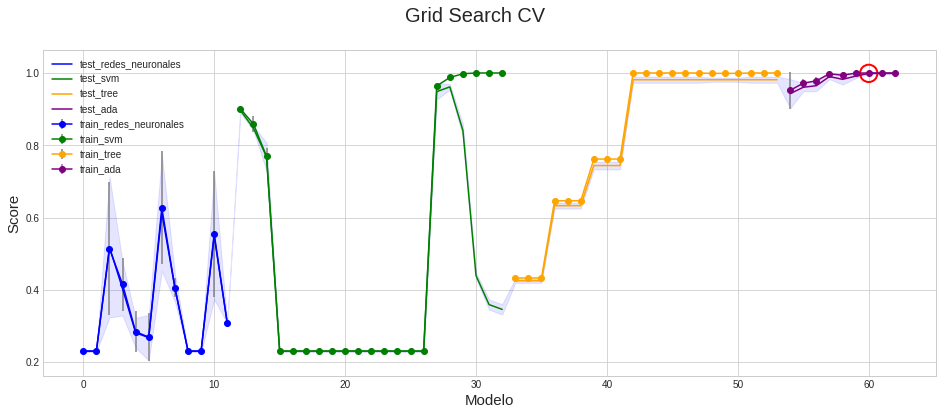

In [129]:
plt.style.use('seaborn-whitegrid')
x_ax = list(range(0,len(scores_mean)))
plt.rcParams['figure.figsize'] = (16, 6)

plt.fill_between(x_ax, scores_mean- scores_sd, scores_mean + scores_sd,
                 alpha=0.1, color='blue')

plt.scatter(np.argmax(scores_mean), scores_mean[np.argmax(scores_mean),],
            s=300, linewidth=2, facecolors = 'none', edgecolors='red')


plt.plot(x_ax[0:12], scores_mean[0:12], color='blue',label='test_redes_neuronales')
plt.errorbar(x_ax[0:12], scores_mean_tr[0:12], yerr=scores_sd_tr[0:12], fmt='-o', color='blue',
             ecolor='gray',label='train_redes_neuronales')


plt.plot(x_ax[12:33], scores_mean[12:33], color='green',label='test_svm')
plt.errorbar(x_ax[12:33], scores_mean_tr[12:33], yerr=scores_sd_tr[12:33], fmt='-o', color='green',
             ecolor='gray',label='train_svm')


plt.plot(x_ax[33:54], scores_mean[33:54], color='orange',label='test_tree')
plt.errorbar(x_ax[33:54], scores_mean_tr[33:54], yerr=scores_sd_tr[33:54], fmt='-o', color='orange',
             ecolor='gray',label='train_tree')

plt.plot(x_ax[54:], scores_mean[54:], color='purple',label='test_ada')
plt.errorbar(x_ax[54:], scores_mean_tr[54:], yerr=scores_sd_tr[54:], fmt='-o', color='purple',
             ecolor='gray',label='train_ada')


plt.xlabel('Modelo',size=15)
plt.ylabel('Score',size=15)
plt.suptitle('Grid Search CV',size=20)
plt.legend(loc="best")
plt.show()

AxesSubplot(0.125,0.125;0.62x0.755)
              precision    recall  f1-score   support

     Apricot       1.00      1.00      1.00        30
     Avocado       1.00      1.00      1.00        30
   Carambula       1.00      1.00      1.00        30
      Cherry       1.00      1.00      1.00        30
 Huckleberry       1.00      1.00      1.00        30
        Kiwi       1.00      1.00      1.00        30
      Orange       1.00      1.00      1.00        30
       Peach       1.00      1.00      1.00        30
   Pineapple       1.00      1.00      1.00        30
  Strawberry       1.00      1.00      1.00        30
Tarea_3/data       1.00      1.00      1.00        90

    accuracy                           1.00       390
   macro avg       1.00      1.00      1.00       390
weighted avg       1.00      1.00      1.00       390



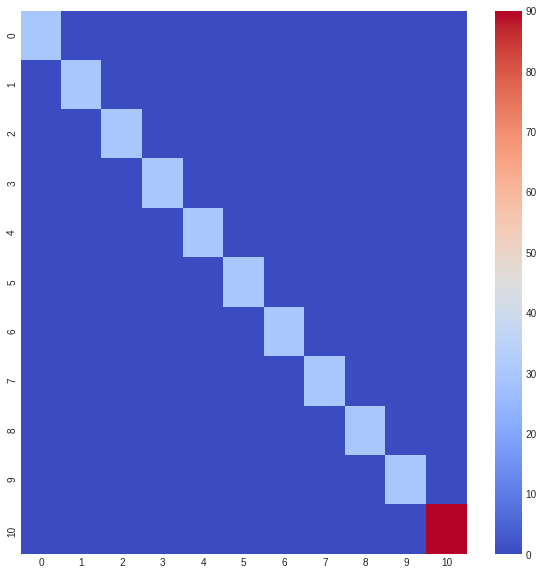

In [130]:
y_predict = GS.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_predict)
fig, axs = plt.subplots(figsize=(10,10))
print(sns.heatmap(confusion_matrix, annot=False, cmap="coolwarm", xticklabels = True, yticklabels = True))
print(metrics.classification_report(y_test, y_predict))